Lesson 6.1.4 Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#type(lats)
#type(lat_lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#type(coordinates)

Lesson 6.1.5 Generate Random World Cities

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #country = citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ee665a25356ae395168c7430eaefc45b


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ee665a25356ae395168c7430eaefc45b&q=Boston


Lesson 6.2.4 Make a Request for Data to an API

In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
city_weather.status_code

200

In [11]:
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":69.49,"feels_like":69.22,"temp_min":66,"temp_max":73.99,"pressure":1013,"humidity":83},"wind":{"speed":9.17,"deg":80},"clouds":{"all":56},"dt":1592869546,"sys":{"type":1,"id":4967,"country":"US","sunrise":1592816870,"sunset":1592871887},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
type(city_weather)

requests.models.Response

In [13]:
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 69.49,
  'feels_like': 69.22,
  'temp_min': 66,
  'temp_max': 73.99,
  'pressure': 1013,
  'humidity': 83},
 'wind': {'speed': 9.17, 'deg': 80},
 'clouds': {'all': 56},
 'dt': 1592869546,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1592816870,
  'sunset': 1592871887},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

Handle Request Errors

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bstn"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


Lesson 6.2.5 Make a Request for Data to an API

In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 69.49,
  'feels_like': 69.22,
  'temp_min': 66,
  'temp_max': 73.99,
  'pressure': 1013,
  'humidity': 83},
 'wind': {'speed': 9.17, 'deg': 80},
 'clouds': {'all': 56},
 'dt': 1592869546,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1592816870,
  'sunset': 1592871887},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

Lesson 6.2.5 Parse a Response from an API

In [17]:
# Get the JSON data.
boston_data = city_weather.json()
type(boston_data)

dict

In [18]:
boston_data['sys']

{'type': 1,
 'id': 4967,
 'country': 'US',
 'sunrise': 1592816870,
 'sunset': 1592871887}

In [19]:
boston_data['sys']['country']

'US'

In [20]:
# retrieve the date in the weather data
boston_data["dt"]

1592869546

In [21]:
# Get the latitude value from Boston JSON data
boston_data['coord']['lat']

42.36

In [22]:
# Get the Temperature Boston JSON data
#'coord': {'lon': -71.06, 'lat': 42.36}
boston_data['main']['temp_max']

73.99

In [23]:
# Get various stats from Boston JSON data
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 73.99 83 56 9.17


In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 6, 22, 23, 45, 46)

In [25]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-06-22 23:45:46'

Lesson 6.2.6 Get the City Weather Data


In [26]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [27]:
type(cities)

list

In [28]:
len(cities)

618

In [29]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    #city_url = url + "&q=" + "i"
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    # Handle API Request Errors with try-except Blocks
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print(f"{city} not found! Skipping city ...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | puerto quijarro
Processing Record 3 of Set 1 | fortuna
Processing Record 4 of Set 1 | caravelas
Processing Record 5 of Set 1 | gold coast
Processing Record 6 of Set 1 | praia
Processing Record 7 of Set 1 | belushya guba
belushya guba not found! Skipping city ...
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | eisenerz
Processing Record 12 of Set 1 | sayyan
Processing Record 13 of Set 1 | goderich
Processing Record 14 of Set 1 | ishigaki
Processing Record 15 of Set 1 | broome
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | bourges
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 |

Processing Record 38 of Set 4 | eureka
Processing Record 39 of Set 4 | san felipe
Processing Record 40 of Set 4 | napier
Processing Record 41 of Set 4 | dera bugti
Processing Record 42 of Set 4 | bolshoye sorokino
bolshoye sorokino not found! Skipping city ...
Processing Record 43 of Set 4 | illoqqortoormiut
illoqqortoormiut not found! Skipping city ...
Processing Record 44 of Set 4 | bonavista
Processing Record 45 of Set 4 | shache
Processing Record 46 of Set 4 | dikson
Processing Record 47 of Set 4 | rimouski
Processing Record 48 of Set 4 | hambantota
Processing Record 49 of Set 4 | mahebourg
Processing Record 50 of Set 4 | vaitupu
vaitupu not found! Skipping city ...
Processing Record 1 of Set 5 | rudbar
Processing Record 2 of Set 5 | alcudia
Processing Record 3 of Set 5 | westport
Processing Record 4 of Set 5 | luocheng
Processing Record 5 of Set 5 | yarkovo
Processing Record 6 of Set 5 | carnarvon
Processing Record 7 of Set 5 | nizhneyansk
nizhneyansk not found! Skipping city ...


Processing Record 21 of Set 8 | ribeira grande
Processing Record 22 of Set 8 | kytlym
kytlym not found! Skipping city ...
Processing Record 23 of Set 8 | dharchula
Processing Record 24 of Set 8 | espita
Processing Record 25 of Set 8 | maniitsoq
Processing Record 26 of Set 8 | srednekolymsk
Processing Record 27 of Set 8 | lalomanu
lalomanu not found! Skipping city ...
Processing Record 28 of Set 8 | kumluca
Processing Record 29 of Set 8 | anadyr
Processing Record 30 of Set 8 | yelizovo
Processing Record 31 of Set 8 | san patricio
Processing Record 32 of Set 8 | karangampel
Processing Record 33 of Set 8 | tucupita
Processing Record 34 of Set 8 | kuryk
Processing Record 35 of Set 8 | porto novo
Processing Record 36 of Set 8 | shkoder
Processing Record 37 of Set 8 | gazanjyk
Processing Record 38 of Set 8 | torbay
Processing Record 39 of Set 8 | ji-parana
ji-parana not found! Skipping city ...
Processing Record 40 of Set 8 | saint anthony
Processing Record 41 of Set 8 | kauhajoki
Processing

Processing Record 9 of Set 12 | madang
Processing Record 10 of Set 12 | macenta
Processing Record 11 of Set 12 | manggar
Processing Record 12 of Set 12 | payo
Processing Record 13 of Set 12 | vicuna
Processing Record 14 of Set 12 | libourne
Processing Record 15 of Set 12 | havoysund
Processing Record 16 of Set 12 | polunochnoye
Processing Record 17 of Set 12 | pervomayskoye
Processing Record 18 of Set 12 | komsomolskiy
Processing Record 19 of Set 12 | kargasok
Processing Record 20 of Set 12 | angoche
Processing Record 21 of Set 12 | coos bay
Processing Record 22 of Set 12 | luganville
Processing Record 23 of Set 12 | cruden bay
cruden bay not found! Skipping city ...
Processing Record 24 of Set 12 | clearlake
Processing Record 25 of Set 12 | mizan teferi
Processing Record 26 of Set 12 | jatai
Processing Record 27 of Set 12 | brigham city
Processing Record 28 of Set 12 | tuggurt
tuggurt not found! Skipping city ...
Processing Record 29 of Set 12 | solnechnyy
Processing Record 30 of Set 

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,55.00,93,75,19.46,AU,2020-06-22 23:48:03
1,Puerto Quijarro,-17.78,-57.77,76.39,51,82,1.39,BO,2020-06-22 23:50:27
2,Fortuna,40.60,-124.16,72.00,68,20,11.41,US,2020-06-22 23:41:48
3,Caravelas,-17.71,-39.25,69.40,80,3,2.91,BR,2020-06-22 23:37:28
4,Gold Coast,-28.00,153.43,61.00,58,0,9.17,AU,2020-06-22 23:46:59
5,Praia,14.92,-23.51,78.80,74,0,16.11,CV,2020-06-22 23:41:37
6,Rikitea,-23.12,-134.97,69.49,60,56,16.58,PF,2020-06-22 23:50:29
7,New Norfolk,-42.78,147.06,55.00,92,100,3.00,AU,2020-06-22 23:36:25
8,Cabo San Lucas,22.89,-109.91,86.00,51,5,6.93,MX,2020-06-22 23:39:22
9,Eisenerz,47.53,14.88,64.99,62,57,5.19,AT,2020-06-22 23:50:29


In [31]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2020-06-22 23:48:03,-42.88,147.33,55.00,93,75,19.46
1,Puerto Quijarro,BO,2020-06-22 23:50:27,-17.78,-57.77,76.39,51,82,1.39
2,Fortuna,US,2020-06-22 23:41:48,40.60,-124.16,72.00,68,20,11.41
3,Caravelas,BR,2020-06-22 23:37:28,-17.71,-39.25,69.40,80,3,2.91
4,Gold Coast,AU,2020-06-22 23:46:59,-28.00,153.43,61.00,58,0,9.17
5,Praia,CV,2020-06-22 23:41:37,14.92,-23.51,78.80,74,0,16.11
6,Rikitea,PF,2020-06-22 23:50:29,-23.12,-134.97,69.49,60,56,16.58
7,New Norfolk,AU,2020-06-22 23:36:25,-42.78,147.06,55.00,92,100,3.00
8,Cabo San Lucas,MX,2020-06-22 23:39:22,22.89,-109.91,86.00,51,5,6.93
9,Eisenerz,AT,2020-06-22 23:50:29,47.53,14.88,64.99,62,57,5.19


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

Section 6.3.1 Plot Latitude vs. Temperature

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [34]:
# Import the time module.
import time
# Get today's date in seconds.

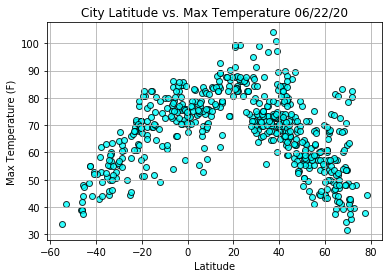

In [35]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            color="cyan", edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1-Temperature.png")

# Show plot.
plt.show()

Section 6.3.2 Plot Latitude vs. Humidity

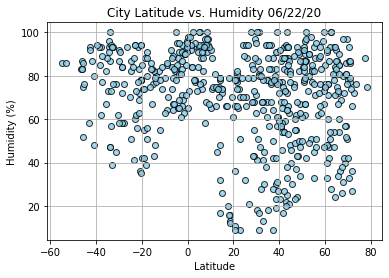

In [36]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            color="skyblue", edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2-Humidity.png")

# Show plot.
plt.show()

Section 6.3.3 Plot Latitude vs. Cloudiness

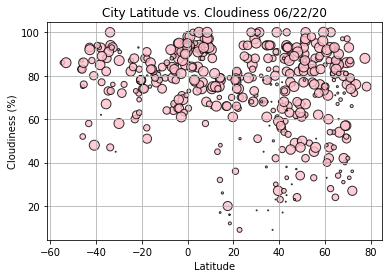

In [37]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            cloudiness,
            color="pink", edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3-Cloudiness.png")

# Show plot.
plt.show()

Section 6.3.4 Plot Latitude vs. Wind Speed

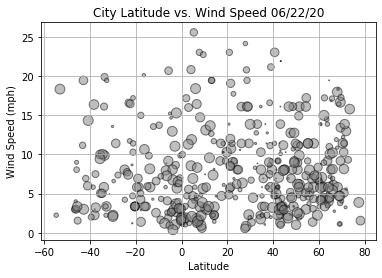

In [38]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            cloudiness,
            color="grey", edgecolor="black", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4-Windspeed.png")

# Show plot.
plt.show()

Section 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [39]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [40]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere


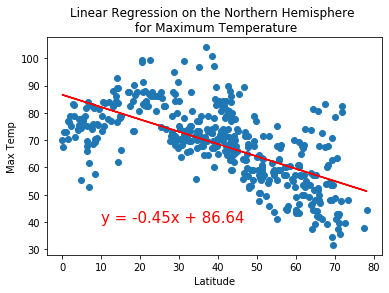

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (10,40))

Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

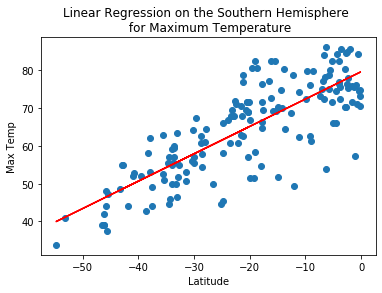

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

Section 6.4.3 Find the Correlation Between Latitude and Maximum Temperature

Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

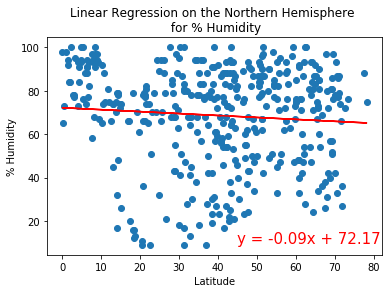

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (45,10))

Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

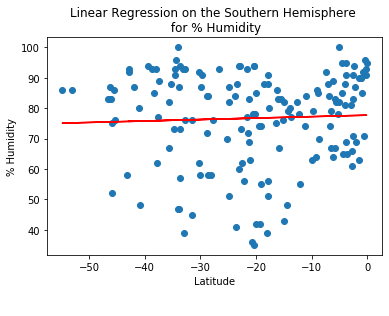

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-55,15))

Section 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness


Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

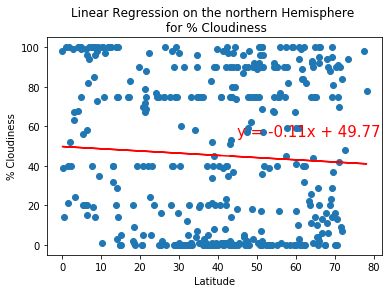

In [46]:
# Linear regression on the northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(45,55))

Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

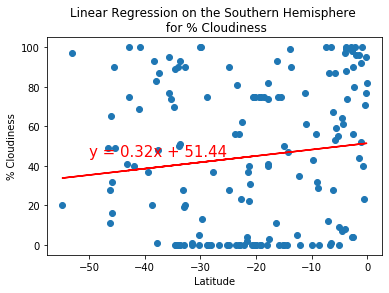

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,45))

6.4.5 Find the Correlation Between Latitude and Wind Speed

Perform Linear Regression on the Wind Speed for the Northern Hemisphere

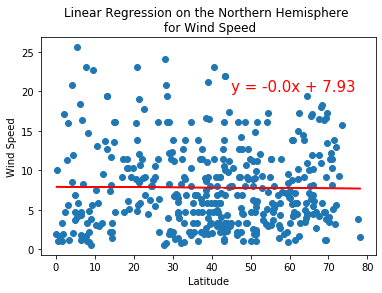

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (45,20))

Perform Linear Regression on the Wind Speed for the Southern Hemisphere

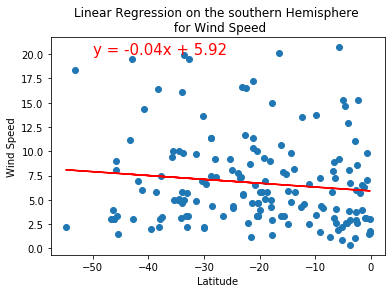

In [49]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (-50,20))